## Support Vector Regression

## Importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## import Dataset

In [15]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [16]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [17]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [18]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [19]:
y = y.reshape(len(y), 1)

In [20]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [22]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [23]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training SVR model On Dataset

In [27]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting New result

In [31]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

## Visualizing SVR

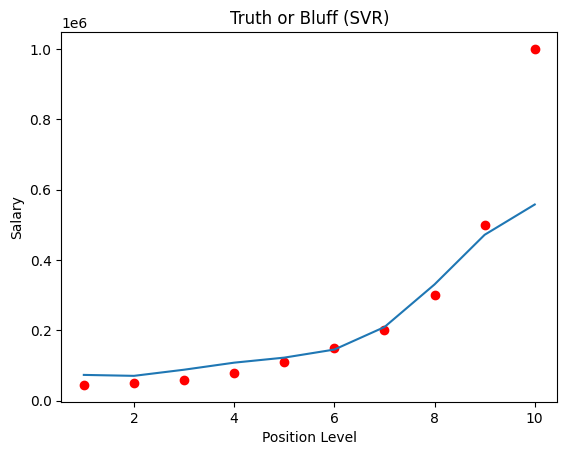

In [35]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## SVR Result in high Resolution

<ipython-input-45-1f42f2a05f89>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np. arange (min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)) , 0.1)


ValueError: Expected 2D array, got 1D array instead:
array=[-0.6197853  -0.62525029 -0.62965521 -0.63300802 -0.63532454 -0.63662807
 -0.63694918 -0.63632519 -0.63479971 -0.63242213 -0.62924694 -0.62533311
 -0.62074342 -0.61554369 -0.60980206 -0.60358823 -0.59697272 -0.59002609
 -0.58281818 -0.57541738 -0.56788994 -0.56029919 -0.55270493 -0.54516272
 -0.53772326 -0.53043178 -0.52332744 -0.51644279 -0.50980324 -0.50342653
 -0.49732233 -0.49149176 -0.48592702 -0.4806111  -0.47551745 -0.47060983
 -0.46584212 -0.46115831 -0.45649253 -0.45176923 -0.44690338 -0.44180094
 -0.43635935 -0.43046818 -0.42401003 -0.41686141 -0.40889394 -0.39997561
 -0.38997221 -0.37874894 -0.36617206 -0.35211075 -0.33643903 -0.31903772
 -0.29979649 -0.27861589 -0.25540944 -0.23010552 -0.20264935 -0.17300474
 -0.14115569 -0.10710785 -0.07088969 -0.03255344  0.00782423  0.05014191
  0.09427342  0.14006817  0.18735182  0.23592739  0.28557658  0.33606162
  0.38712726  0.43850318  0.48990663  0.54104529  0.59162039  0.64132987
  0.68987174  0.73694747  0.78226531  0.82554365  0.86651422  0.90492511
  0.94054365  0.973159    1.00258443  1.02865934  1.05125085  1.07025506].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

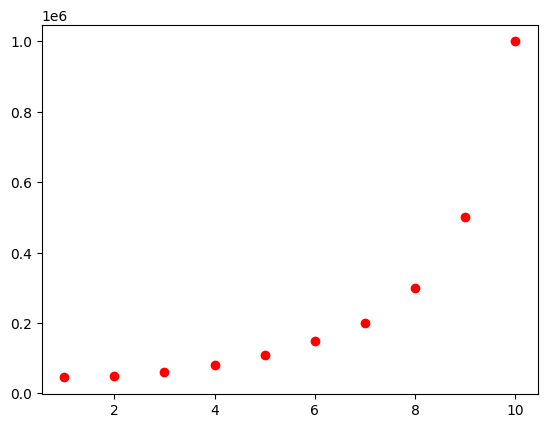

In [45]:
X_grid = np. arange (min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)) , 0.1)
X_grid = X_grid. reshape( (len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red' )
plt. plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid).reshape(-1,1))), color = 'blue' )
plt.title( 'Truth or Bluff (SVR) ')
plt. xlabel ( 'Position level' )
plt. ylabel ( 'Salary')
plt. show()